# 1. 線形回帰

In [6]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn
import copy

/Users/kmotohas/learn/mathematics-of-statistical-machine-learning/.venv/lib/python3.7/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## 1.1 最小二乗法

$$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum^N_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^N_{i=1}(x_i-\bar{x})^2} \\
\hat{\beta}_0 &=& \bar{y} - \hat{\beta}_1\bar{x}
\end{eqnarray}
$$

$\hat{\beta}_1$ は行列 $X=(x_1, ..., x_N),\, Y=(y_1, ..., y_N)$ と単位行列$I$を用いて以下のように書き換えられる。

$$
\hat{\beta}_1 = \frac{(X-\bar{x}I)\cdot(Y-\bar{y}I)}{||X-\bar{x}||_2}
$$

In [19]:
def min_sq(x: np.array, y: np.array) -> Tuple[float, float]:
    
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot((x - x_bar), (y - y_bar)) / np.linalg.norm(x - x_bar) ** 2
    beta_0 = y_bar - beta_1 * x_bar
    return (beta_1, beta_0)

In [20]:
N = 100
# location (mean), scale (standard deviation), size (output shape)
a = np.random.normal(loc=2, scale=1, size=N)
b = randn(1)
x = randn(N)
y = a * x + b
print(a.shape, b.shape, x.shape, y.shape)

(100,) (1,) (100,) (100,)


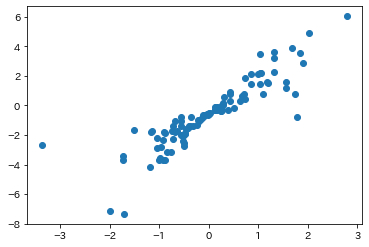

In [21]:
plt.scatter(x, y)

In [22]:
beta1, beta0 = min_sq(x, y)
print(beta1, beta0)

1.963605276588001 -0.5789582425138482


In [23]:
x_sequence = np.arange(-5, 5, 0.1)
y_hat = x_sequence * beta1 + beta0

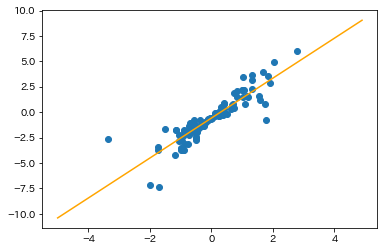

In [25]:
plt.scatter(x, y)
plt.plot(x_sequence, y_hat, c='orange')

## 1.2 重回帰